Task 1

a) executed the code

b) Best algorithm: RandomForest , train data and test data predictions are similar
     
                         R-squared      RMSE  Durbin-Watson  Jarque-Bera    JB P-value
     Train Data          0.999000  0.109241       2.931659     3.769479  1.518686e-01
     Test Data           0.991747  0.319861       1.834557     0.904898    0.636068

c) the code is well structured, readable . It is step by step guide to learn models


# Task 2Function / Class | Description (inputs, main parameters, outputs)

| Function / Class | Description (inputs, main parameters, outputs) |
|---|---|
| sklearn.preprocessing.PolynomialFeatures | Generates polynomial and interaction features from input X. Key params: degree (int, default=2) — max degree; include_bias (bool) — whether to add constant 1 column; interaction_only (bool). Input: X (n_samples, n_features). Output: transformed array with shape (n_samples, n_output_features). Methods: fit, transform, fit_transform. Column names via get_feature_names_out(). |
| sklearn.preprocessing.StandardScaler | Standardizes features by removing mean and scaling to unit variance. Key params: with_mean, with_std. Input: X (n_samples, n_features). After fit: attributes mean_, scale_. Methods: fit, transform, fit_transform. Output: scaled array. |
| sklearn.linear_model.LinearRegression | Ordinary least squares linear regression. Key params: fit_intercept (bool), n_jobs (parallel coef computation). Input to fit: X (n_samples, n_features), y (n_samples,) or (n_samples, n_targets). Methods: fit, predict, score. Outputs: coef_ (coefficients), intercept_. score() returns R². |
| sklearn.svm.SVR | Support Vector Regression. Key params: kernel ('linear','rbf','poly'), C (regularization), degree (for poly), gamma, epsilon (tube size). Input: X, y. Methods: fit, predict, score. Outputs: predictions; score() gives R². |
| sklearn.ensemble.RandomForestRegressor | Ensemble of decision trees for regression. Key params: n_estimators, max_depth, min_samples_split, random_state, n_jobs. Input: X, y. Methods: fit, predict, score. Outputs: feature_importances_, estimator ensemble; score() = R² by default. |
| sklearn.ensemble.GradientBoostingRegressor | Gradient boosting for regression. Key params: loss, learning_rate, n_estimators, max_depth, subsample. Input: X, y. Methods: fit, predict, score. Outputs: staged predictions, feature_importances_. |
| sklearn.neural_network.MLPRegressor | Feedforward neural network for regression. Key params: hidden_layer_sizes, activation, solver, alpha (L2), learning_rate_init, max_iter. Input: X (scaled recommended), y. Methods: fit, predict, partial_fit. Outputs: coefs_, intercepts_, loss_curve_. |
| sklearn.neighbors.KNeighborsRegressor | k‑NN regression. Key params: n_neighbors, weights ('uniform'/'distance'), metric. Input: X, y. Methods: fit (stores training set), predict, kneighbors. Output: averaged target predictions. |
| sklearn.metrics.r2_score | Coefficient of determination (R²). Inputs: y_true, y_pred. Params: sample_weight=None, multioutput='uniform_average'. Output: float R² (1 best, 0 baseline, can be negative). |
| sklearn.metrics.mean_squared_error | Mean squared error. Inputs: y_true, y_pred. Key param: squared=True (if False returns RMSE). Output: MSE (float) or RMSE if squared=False. |
| root_mean_squared_error (not in sklearn) / RMSE pattern | There is no sklearn.root_mean_squared_error function — compute via np.sqrt(mean_squared_error(y_true, y_pred)) or mean_squared_error(..., squared=False). |
| estimator.fit | Common method for all estimators. Inputs: X (n_samples,n_features), y (n_samples,). Effect: estimate model parameters / store fit attributes. Returns self. |
| estimator.predict | Predict method. Input: X (n_samples,n_features). Output: y_pred (n_samples,) or (n_samples,n_targets). |
| estimator.score | Default scoring for regressors is R² (coefficient of determination). Input: X, y. Output: float score (R²). |
| transformer.fit_transform / transform | Convenience methods: fit_transform(X[, y]) fits transformer to X and returns transformed X; transform(X) applies transform using fitted params. Used for PolynomialFeatures and StandardScaler. |


In [ ]:
# imports 
# load the data , create train and test

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone
import statsmodels.api as sm
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# reuse existing X_train, X_test, y_train, y_test from the notebook

# To ensure reproducibility

np.random.seed(42)
# Read data from Excel file
file_path = '../data/regression-multiple-methods.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')
# Select the specified columns
x_train = train_data['x1']
y_train = train_data['y']
x_test = test_data['x1']
y_test = test_data['y']


# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']


algorithms = {
    'LinearRegression': LinearRegression(), #parametric model
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1), # tree based
    'XGBoost/GBR': GradientBoostingRegressor(n_estimators=200, random_state=1),
    'KNN': KNeighborsRegressor(n_neighbors=5), #non parametric
   'NeuralNet': MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=1)
}

: 

Analysis with Polynomial Degree = 1


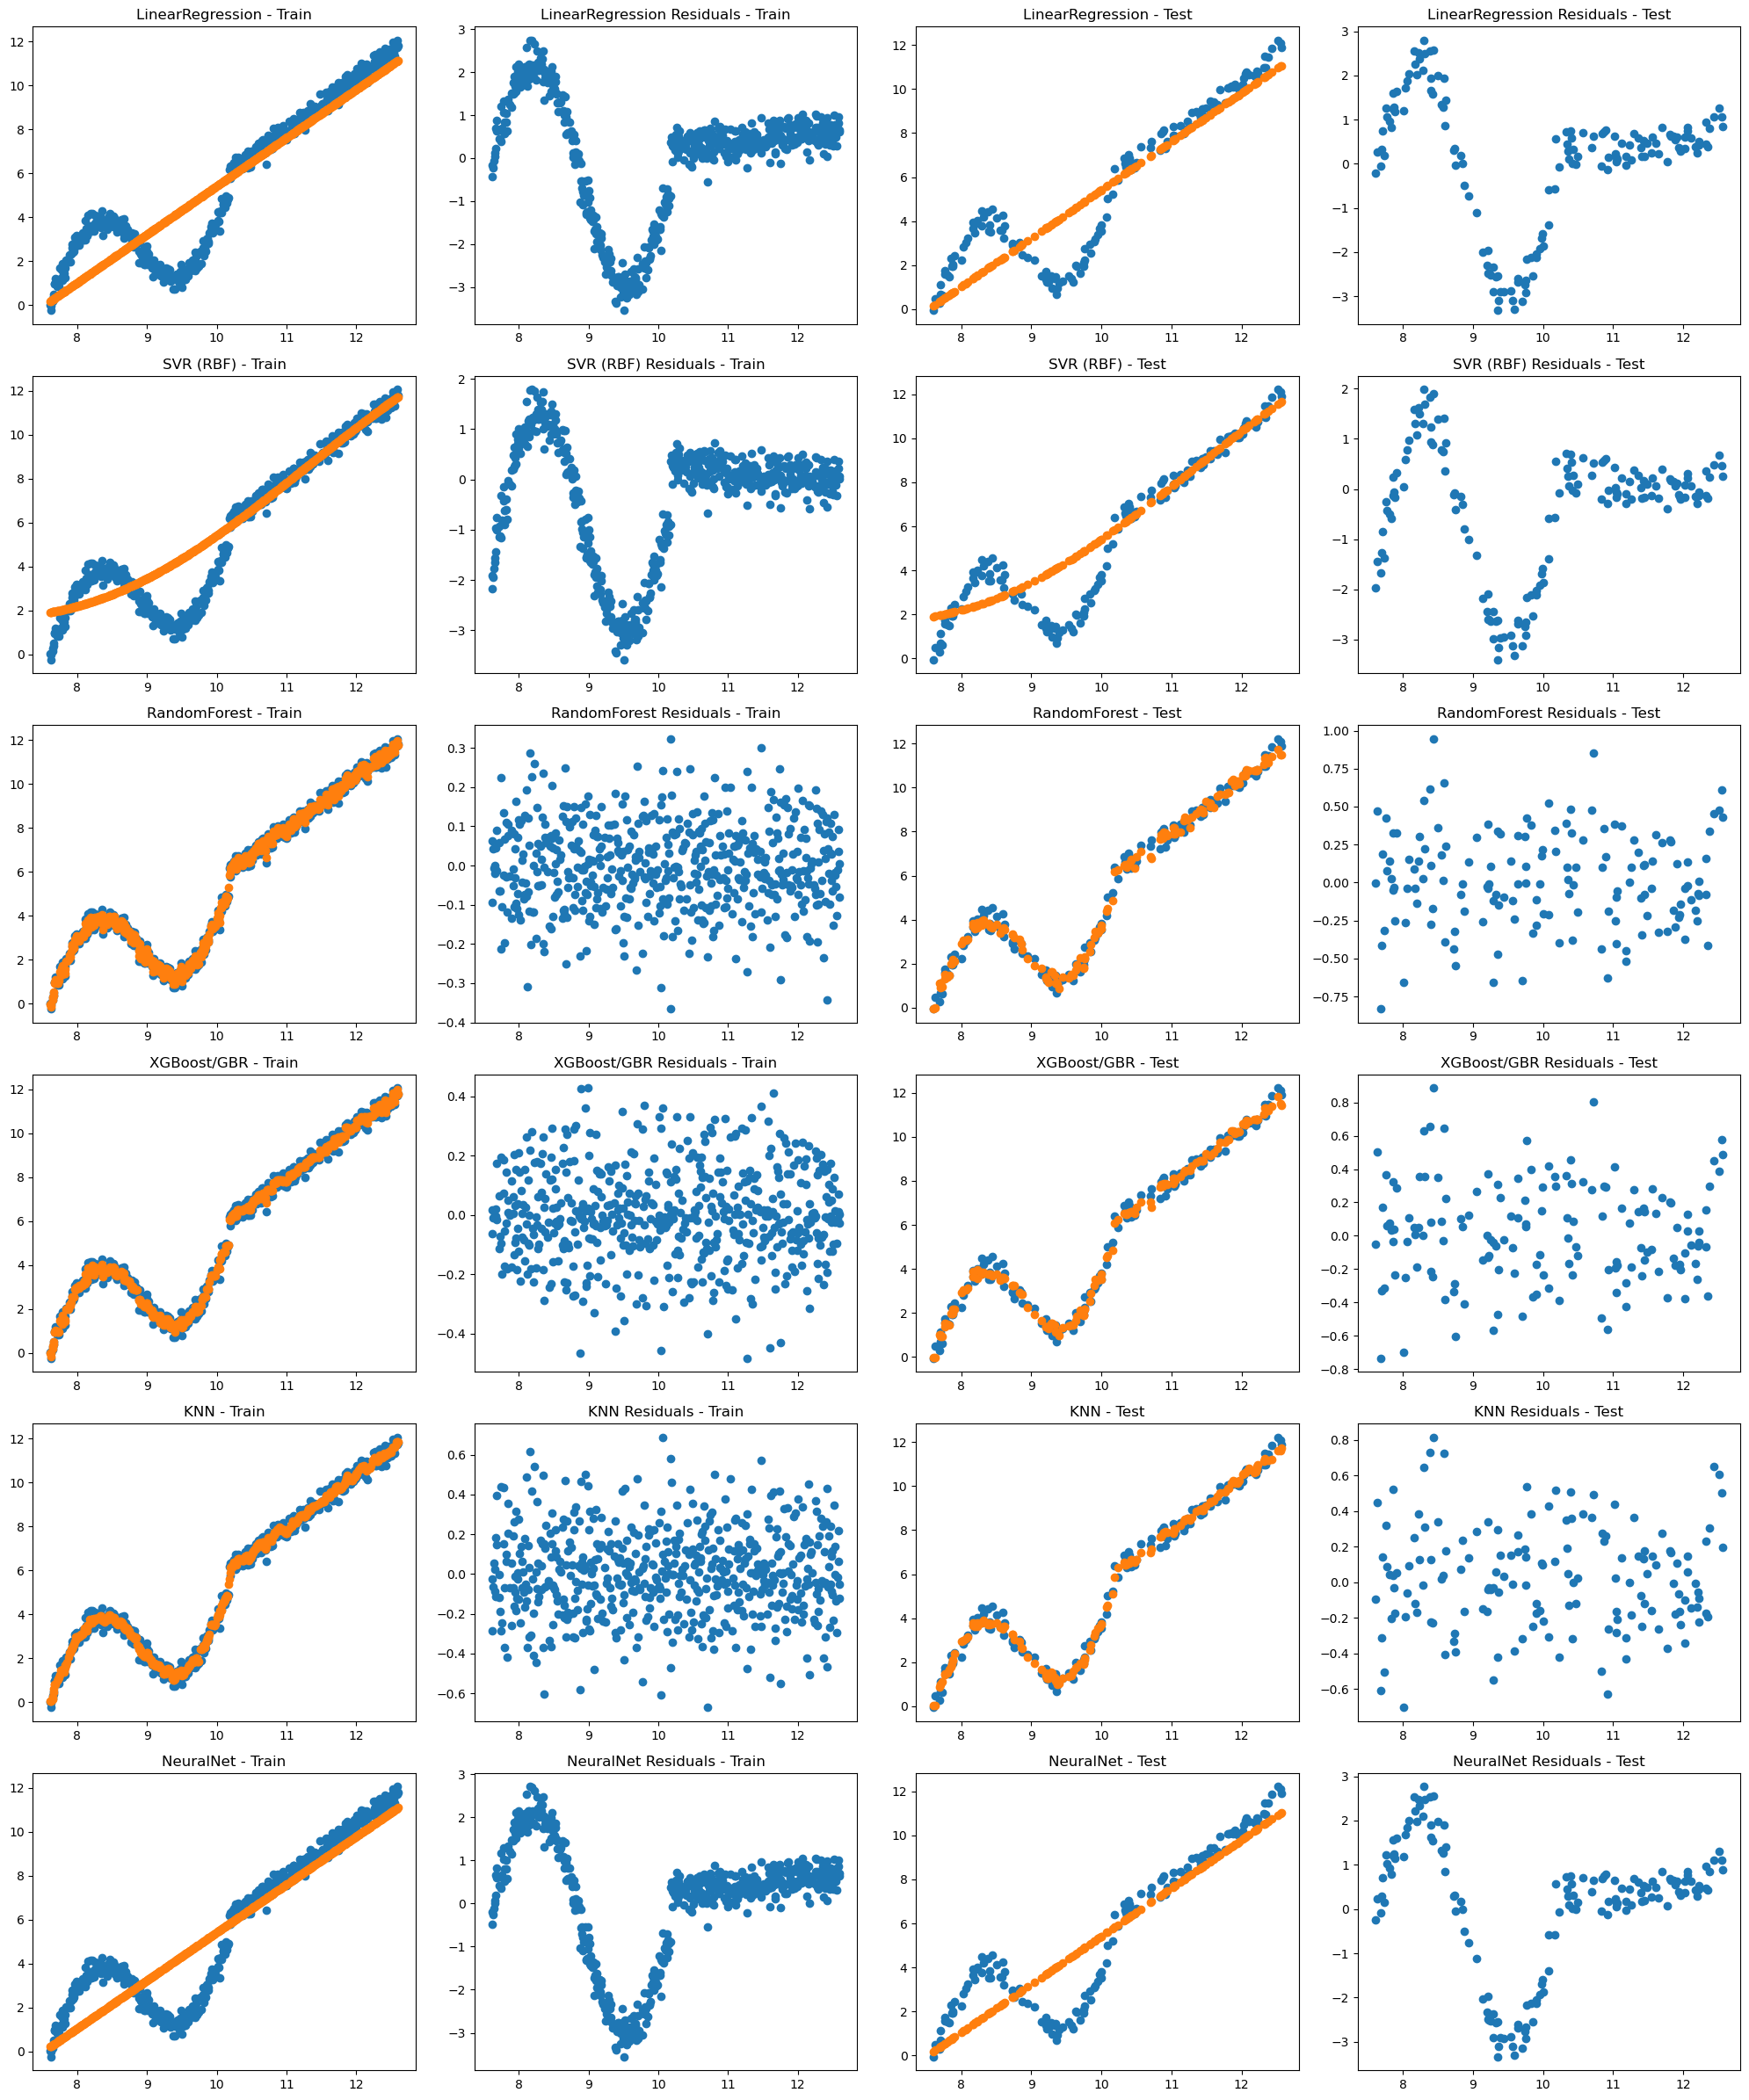

Metrics - Train Data:

                  R-squared      RMSE  Durbin-Watson  Jarque-Bera    JB P-value
RandomForest       0.998989  0.109829       2.973407     1.097560  5.776540e-01
XGBoost/GBR        0.997906  0.158081       2.503741     0.283135  8.679965e-01
KNN                0.995914  0.220821       2.523611     0.816294  6.648810e-01
SVR (RBF)          0.864427  1.272018       0.073278    72.690468  1.642349e-16
LinearRegression   0.833674  1.408923       0.059761    51.466506  6.670987e-12
NeuralNet          0.833633  1.409096       0.059747    55.204561  1.029158e-12
-------------------------------------------------
Metrics - Test Data:

                  R-squared      RMSE  Durbin-Watson  Jarque-Bera  JB P-value
KNN                0.993029  0.293966       1.970294     1.023873    0.599334
XGBoost/GBR        0.992709  0.300640       1.966953     0.579135    0.748587
RandomForest       0.992019  0.314554       1.929286     0.041512    0.979458
SVR (RBF)          0.851209  1.35

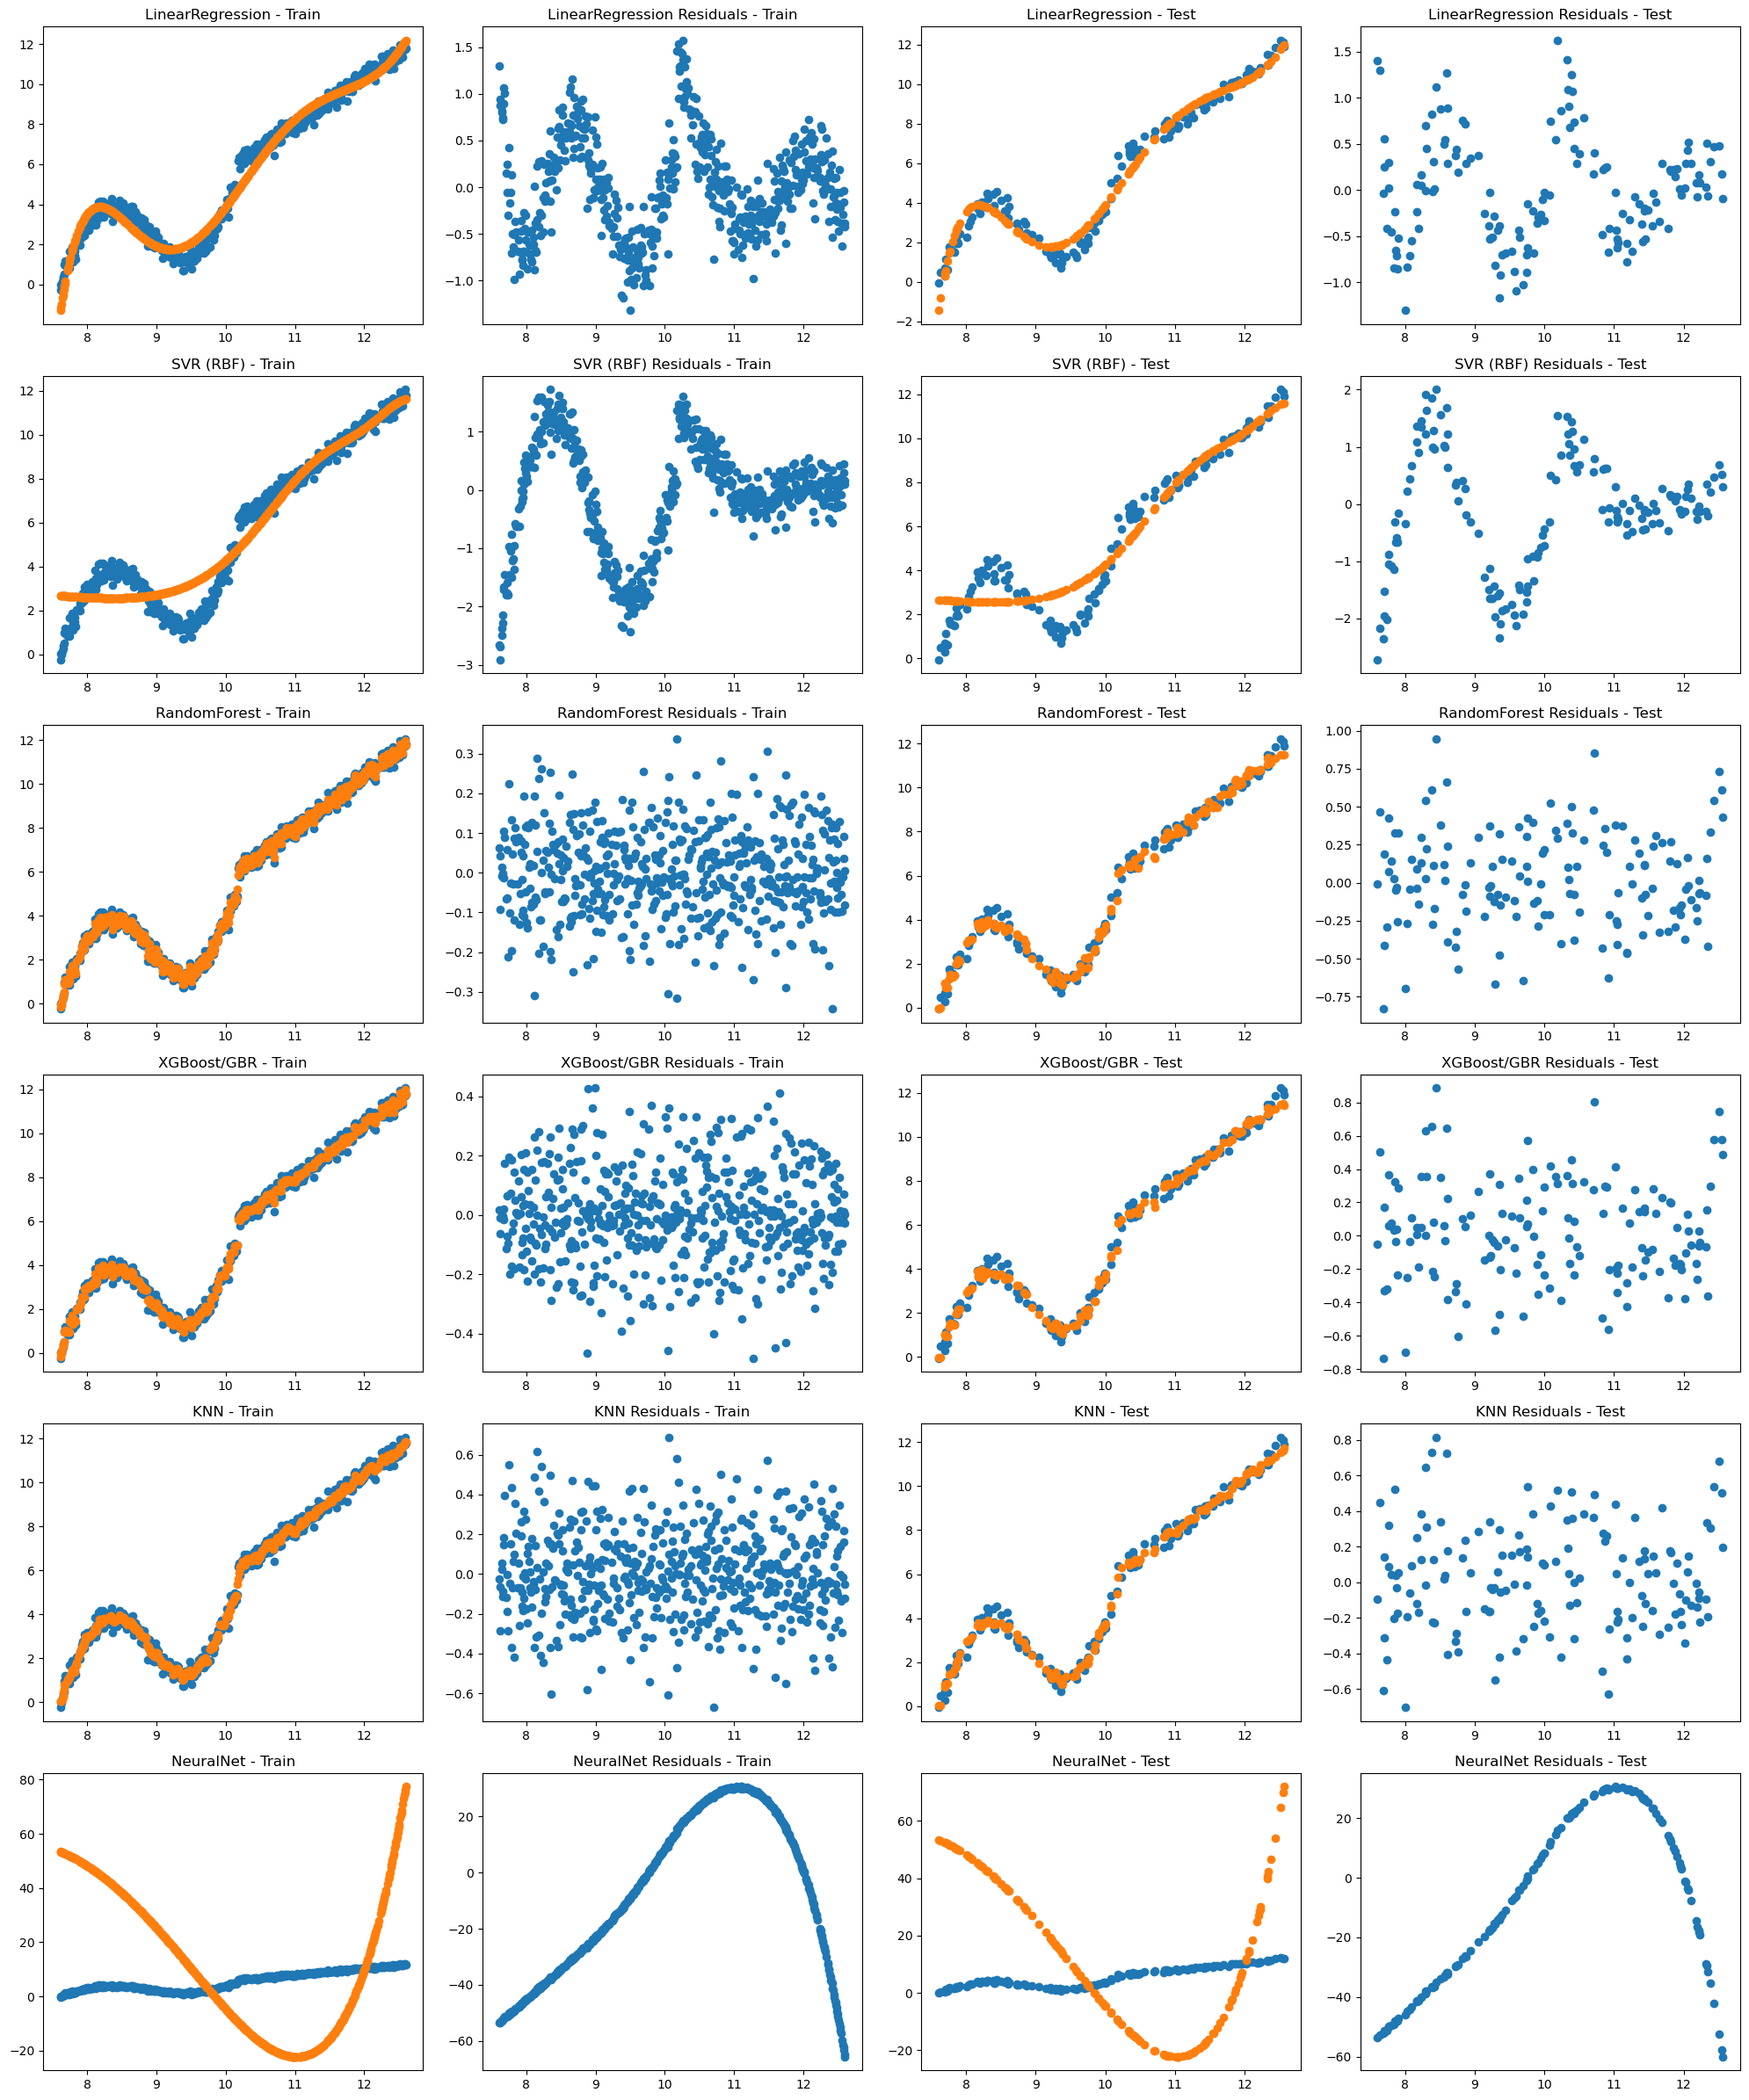

Metrics - Train Data:

                  R-squared       RMSE  Durbin-Watson  Jarque-Bera    JB P-value
RandomForest       0.999013   0.108537       2.967558     0.916928  6.322541e-01
XGBoost/GBR        0.997906   0.158081       2.503741     0.283135  8.679965e-01
KNN                0.995895   0.221345       2.505231     0.733304  6.930509e-01
LinearRegression   0.976261   0.532278       0.417086    11.051059  3.983759e-03
SVR (RBF)          0.925902   0.940394       0.133952    24.685148  4.362026e-06
NeuralNet        -68.357990  28.771050       0.000399    43.997239  2.793322e-10
-------------------------------------------------
Metrics - Test Data:

                  R-squared       RMSE  Durbin-Watson  Jarque-Bera  JB P-value
KNN                0.993051   0.293507       1.993466     1.266390    0.530893
XGBoost/GBR        0.992492   0.305083       1.879592     1.102912    0.576110
RandomForest       0.991803   0.318783       1.869312     0.149181    0.928124
LinearRegression   0.9

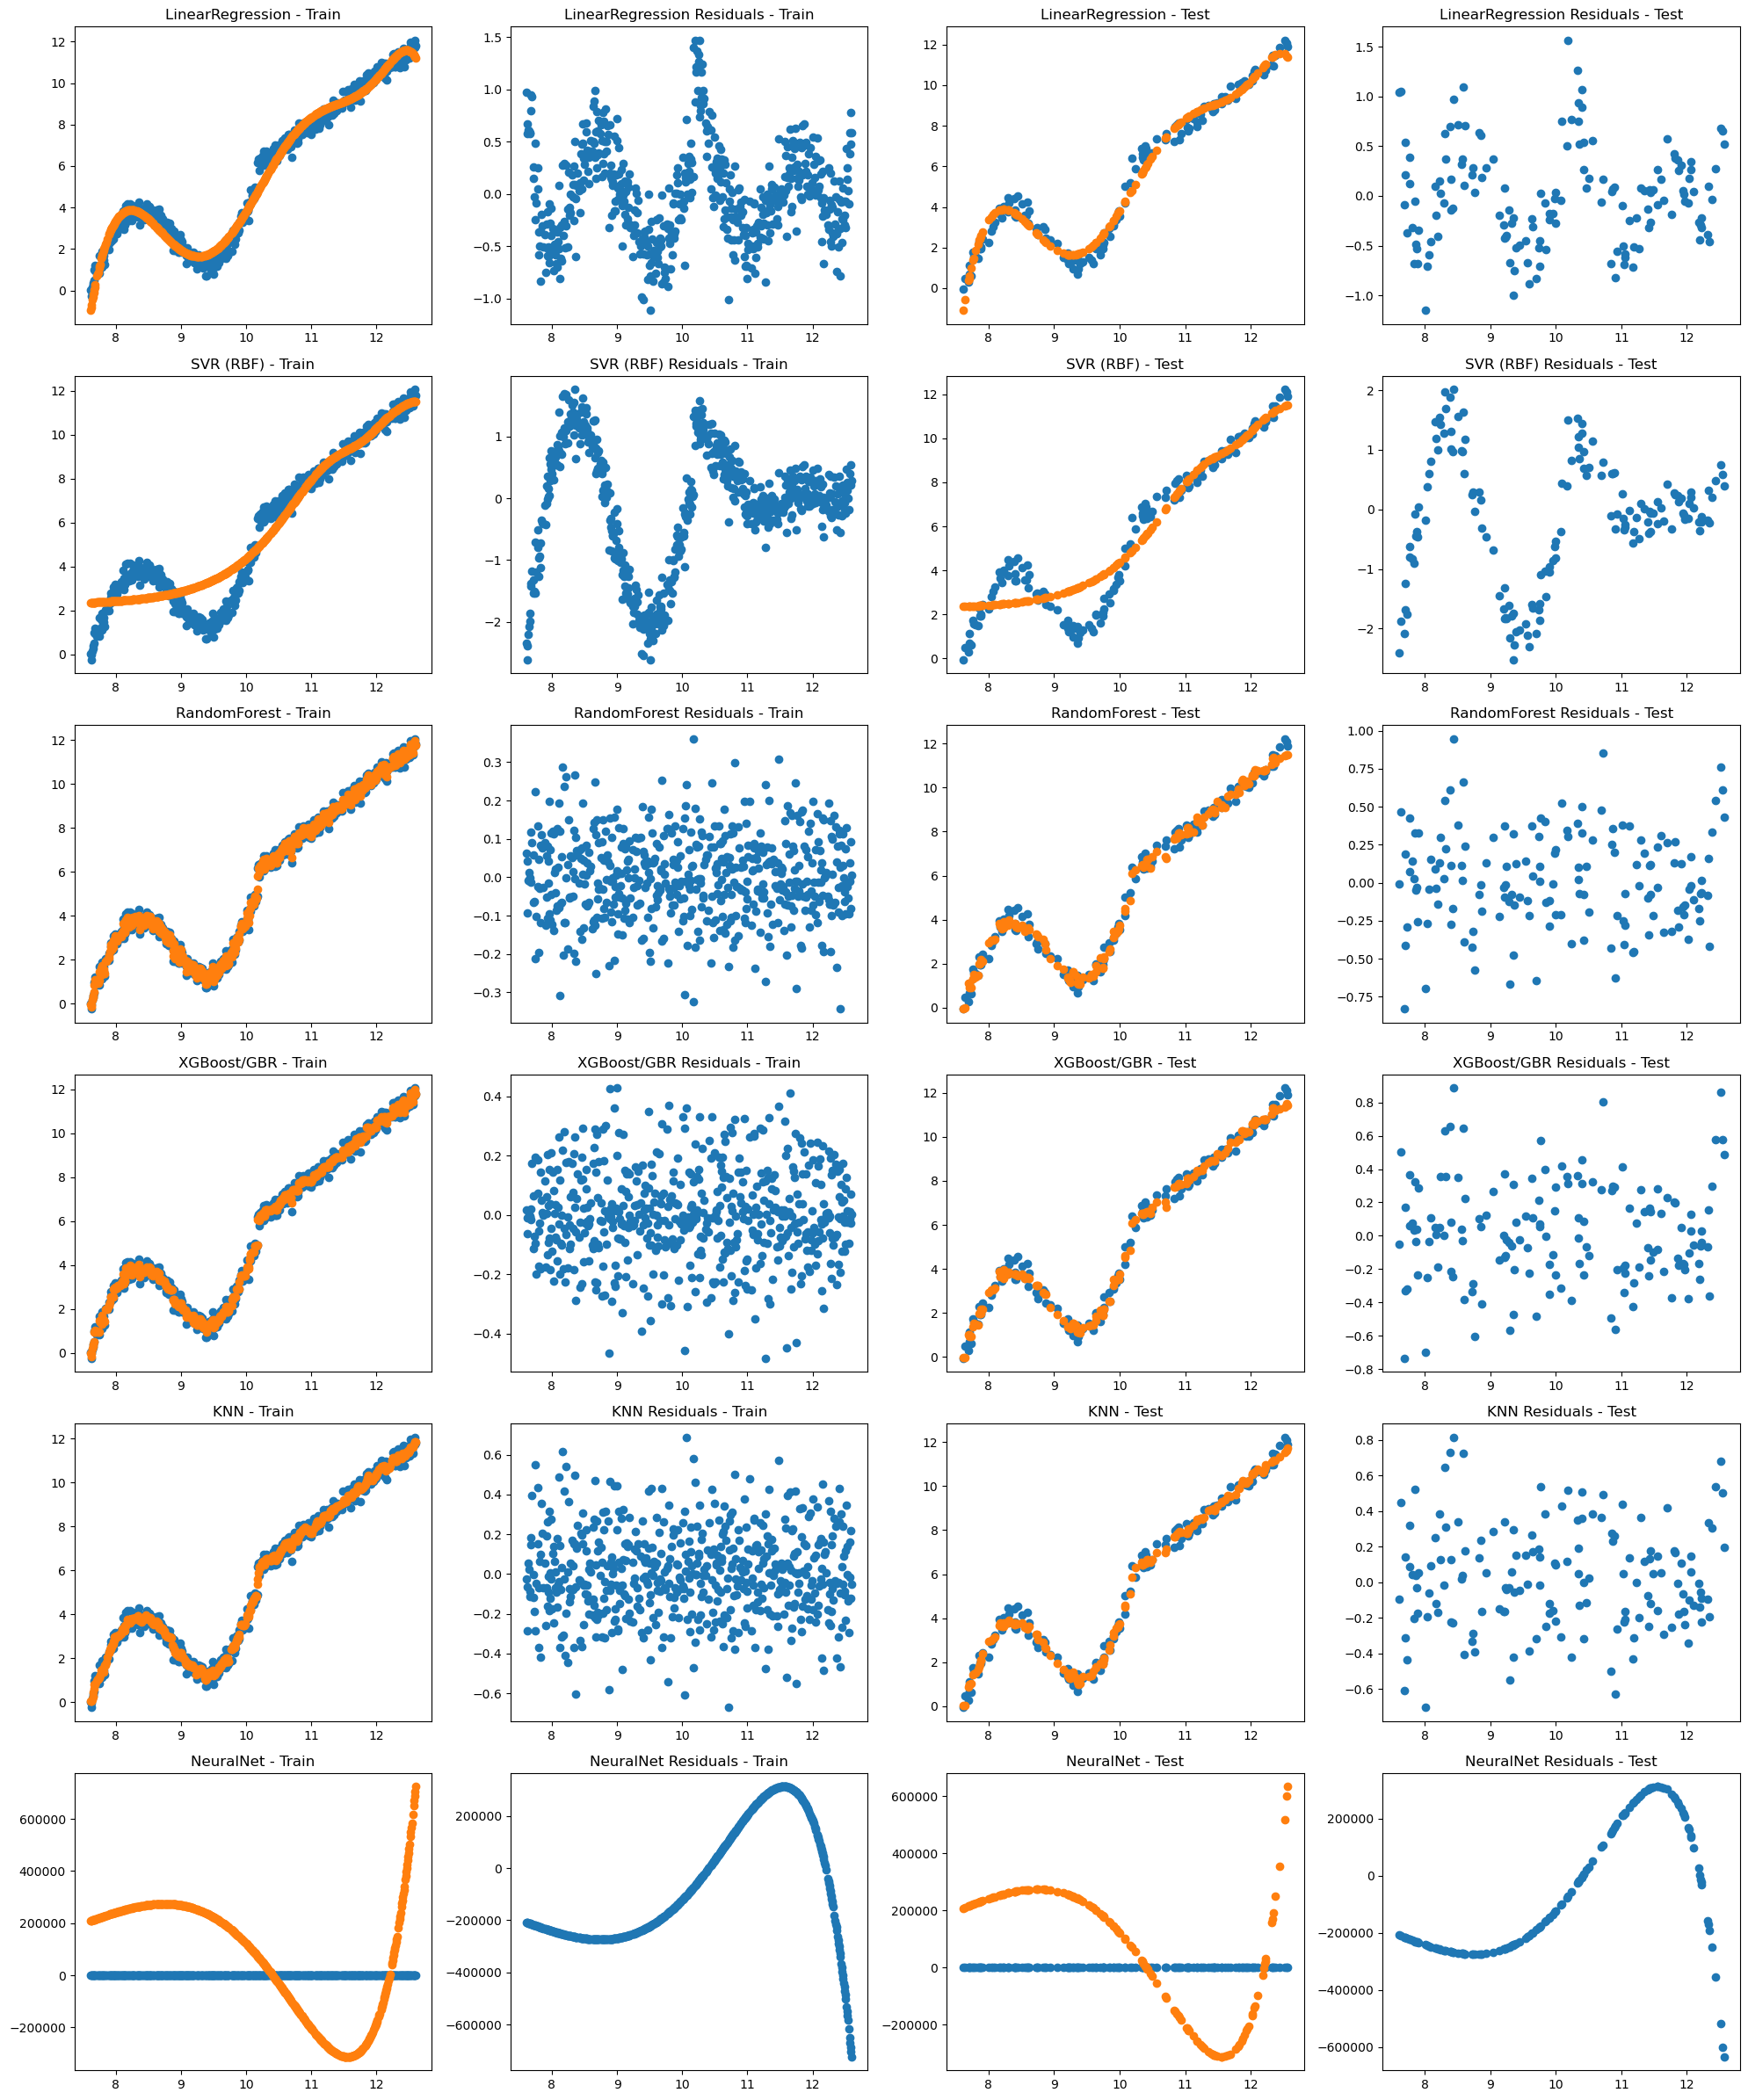

Metrics - Train Data:

                     R-squared           RMSE  Durbin-Watson  Jarque-Bera    JB P-value
RandomForest      9.990084e-01       0.108786       2.964303     1.535954  4.639506e-01
XGBoost/GBR       9.979062e-01       0.158081       2.503741     0.283135  8.679965e-01
KNN               9.958949e-01       0.221345       2.505231     0.733304  6.930509e-01
LinearRegression  9.827069e-01       0.454301       0.572057    18.489214  9.663138e-05
SVR (RBF)         9.200128e-01       0.977052       0.124152    28.863639  5.399338e-07
NeuralNet        -4.836424e+09  240253.443740       0.000583    20.748055  3.123324e-05
-------------------------------------------------
Metrics - Test Data:

                     R-squared           RMSE  Durbin-Watson  Jarque-Bera  JB P-value
KNN               9.930510e-01       0.293507       1.993466     1.266390    0.530893
XGBoost/GBR       9.923750e-01       0.307453       1.866274     1.531514    0.464982
RandomForest      9.917701e-01 

In [74]:
#Task 3: 
# Function to perform analysis with given polynomial degree
def analysisWithDegree(degree):
   
    fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 4 * len(algorithms)))
    fig_row = -1
    metric_table_train = pd.DataFrame()
    metric_table_test = pd.DataFrame()

    # Run the algorithms ... create metrics and plots
    for algorithm_name, algorithm in algorithms.items():
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train model
        algorithm.fit(X_train_poly, y_train)

        # Train predictions
        y_train_pred = algorithm.predict(X_train_poly)

        # Test predictions
        y_test_pred = algorithm.predict(X_test_poly)

        # Train metrics
        r2_train = algorithm.score(X_train_poly, y_train)
        rmse_train = root_mean_squared_error(y_train, y_train_pred)

        # Test metrics
        r2_test = algorithm.score(X_test_poly, y_test)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)

        # Additional metrics using statsmodels for all algorithms
        residuals_train = y_train - y_train_pred
        residuals_test = y_test - y_test_pred

        durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
        jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)

        durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
        jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)

        # Update metric tables
        metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
        metric_table_train.at[algorithm_name, 'RMSE'] = rmse_train
        metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
        metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
        metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

        metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
        metric_table_test.at[algorithm_name, 'RMSE'] = rmse_test
        metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
        metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
        metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test

        # Create the plots
        fig_row = fig_row+1

        axs[fig_row, 0].scatter(X_train, y_train)
        axs[fig_row, 0].scatter(X_train, y_train_pred)
        axs[fig_row, 0].set_title(algorithm_name + " - Train")

        axs[fig_row, 1].scatter(X_train, residuals_train)
        axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")

        axs[fig_row, 2].scatter(X_test, y_test)
        axs[fig_row, 2].scatter(X_test, y_test_pred)
        axs[fig_row, 2].set_title(algorithm_name + " - Test")

        axs[fig_row, 3].scatter(X_test, residuals_test)
        axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
    ############################

    plt.tight_layout()
    plt.show()
    
    print("Metrics - Train Data:\n")
    #sort by R-squared in descending order
    metric_table_train_sorted = metric_table_train.sort_values(by='R-squared', ascending=False)
    print(metric_table_train_sorted.to_string())
    print("-------------------------------------------------")


    print("Metrics - Test Data:\n")
    #sort by R-squared in descending order
    metric_table_test_sorted = metric_table_test.sort_values(by='R-squared', ascending=False)
    print(metric_table_test_sorted.to_string())


#Run analysis for different polynomial degrees
print("Analysis with Polynomial Degree = 1")
analysisWithDegree(degree=1)
print("---------------------------------------------------------------------------------------------")
print("Analysis with Polynomial Degree = 6")
analysisWithDegree(degree=6)
print("---------------------------------------------------------------------------------------------")
print("Analysis with Polynomial Degree = 10")
analysisWithDegree(degree=10)

##Conclusions:
# Most affected (visually)
#     LinearRegression, SVR (RBF), KNN, NeuralNet.
# Least affected (visually)
#     RandomForest and GradientBoosting (tree ensembles).


In [75]:
#Task 4:

#Standardization effect on polynomial features

def analysisWithDegreeWithStandardization(degree, standardize=False):
    """
    Return dataframe of RMSEs (train & test) for all algorithms at given polynomial degree.
    standardize: if True, apply StandardScaler to the polynomial features before fitting.
    """
    
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    if standardize:
        scaler = StandardScaler().fit(X_train_poly)
        Xtr = scaler.transform(X_train_poly)
        Xte = scaler.transform(X_test_poly)
    else:
        Xtr = X_train_poly.copy()
        Xte = X_test_poly.copy()

    rows = []
    for name, algorithm in algorithms.items():
        mdl = clone(algorithm)
        mdl.fit(Xtr, y_train)
        ytr_pred = mdl.predict(Xtr)
        yte_pred = mdl.predict(Xte)
        rmse_tr = np.sqrt(mean_squared_error(y_train, ytr_pred))
        rmse_te = np.sqrt(mean_squared_error(y_test,  yte_pred))
        rows.append({'Model': name, 'RMSE_train': rmse_tr, 'RMSE_test': rmse_te})

    df_rmse = pd.DataFrame(rows).set_index('Model')
    return df_rmse

deg=10
print(f"\nDegree = {deg}  (no scaling)")
display(analysisWithDegreeWithStandardization(deg, standardize=False).round(4))
print(f"\nDegree = {deg}  (standardized)")
display(analysisWithDegreeWithStandardization(deg, standardize=True).round(4))


Degree = 10  (no scaling)


,RMSE_train,RMSE_test
Model,,
LinearRegression,0.4543,0.4961
SVR (RBF),0.9771,1.0791
RandomForest,0.1088,0.3194
XGBoost/GBR,0.1581,0.3075
KNN,0.2213,0.2935
NeuralNet,240253.4437,233448.2942



Degree = 10  (standardized)


,RMSE_train,RMSE_test
Model,,
LinearRegression,0.2893,0.3176
SVR (RBF),0.8227,0.9746
RandomForest,0.1088,0.3201
XGBoost/GBR,0.1581,0.3081
KNN,0.2213,0.2935
NeuralNet,0.2825,0.3109


In [76]:
# ...existing code...
def analysisWithDegreeWithOutliers(degree, standardize=False, outliers=False):
    """
    Return dataframe of RMSEs (train & test) for all algorithms at given polynomial degree.
    standardize: if True, apply StandardScaler to the polynomial features before fitting.
    outliers: if True, add 5 synthetic outlier rows to the training set (X and y).
    """
    # create local copies to avoid shadowing globals
    if outliers:
        extra_X = [X_train['x1'].mean() + x for x in np.random.randn(5)]
        extra_y = [y_train.max() + 4 + x for x in np.random.randn(5)]
        X_train_local = np.array(list(X_train['x1']) + extra_X).reshape(-1, 1)
        y_train_local = np.array(list(y_train) + extra_y)
    else:
        # keep original structures (array / DataFrame / Series) but convert to numpy for consistency
        X_train_local = X_train.values if hasattr(X_train, "values") else np.asarray(X_train)
        y_train_local = y_train.values if hasattr(y_train, "values") else np.asarray(y_train)

    # ensure X_test is numpy array for transformation
    X_test_arr = X_test.values if hasattr(X_test, "values") else np.asarray(X_test)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_local)
    X_test_poly  = poly.transform(X_test_arr)

    if standardize:
        scaler = StandardScaler().fit(X_train_poly)
        Xtr = scaler.transform(X_train_poly)
        Xte = scaler.transform(X_test_poly)
    else:
        Xtr = X_train_poly.copy()
        Xte = X_test_poly.copy()

    rows = []
    for name, algorithm in algorithms.items():
        mdl = clone(algorithm)
        mdl.fit(Xtr, y_train_local)
        ytr_pred = mdl.predict(Xtr)
        yte_pred = mdl.predict(Xte)
        rmse_tr = np.sqrt(mean_squared_error(y_train_local, ytr_pred))
        rmse_te = np.sqrt(mean_squared_error(y_test,  yte_pred))
        rows.append({'Model': name, 'RMSE_train': rmse_tr, 'RMSE_test': rmse_te})

    df_rmse = pd.DataFrame(rows).set_index('Model')
    return df_rmse
# ...existing code...

print("\nDegree = 6 with Standardization and with Outliers")
analysisWithDegreeWithOutliers(degree=6, standardize=False, outliers=True)

#Conclusions:
# Standardization helps stabilize models sensitive to feature scaling (SVR, NeuralNet) when polynomial



Degree = 6 with Standardization and with Outliers


,RMSE_train,RMSE_test
Model,,
LinearRegression,1.166788,0.594357
SVR (RBF),1.404749,1.055472
RandomForest,0.502582,1.402414
XGBoost/GBR,0.181622,2.089941
KNN,0.968828,0.681297
NeuralNet,31.048953,31.176693


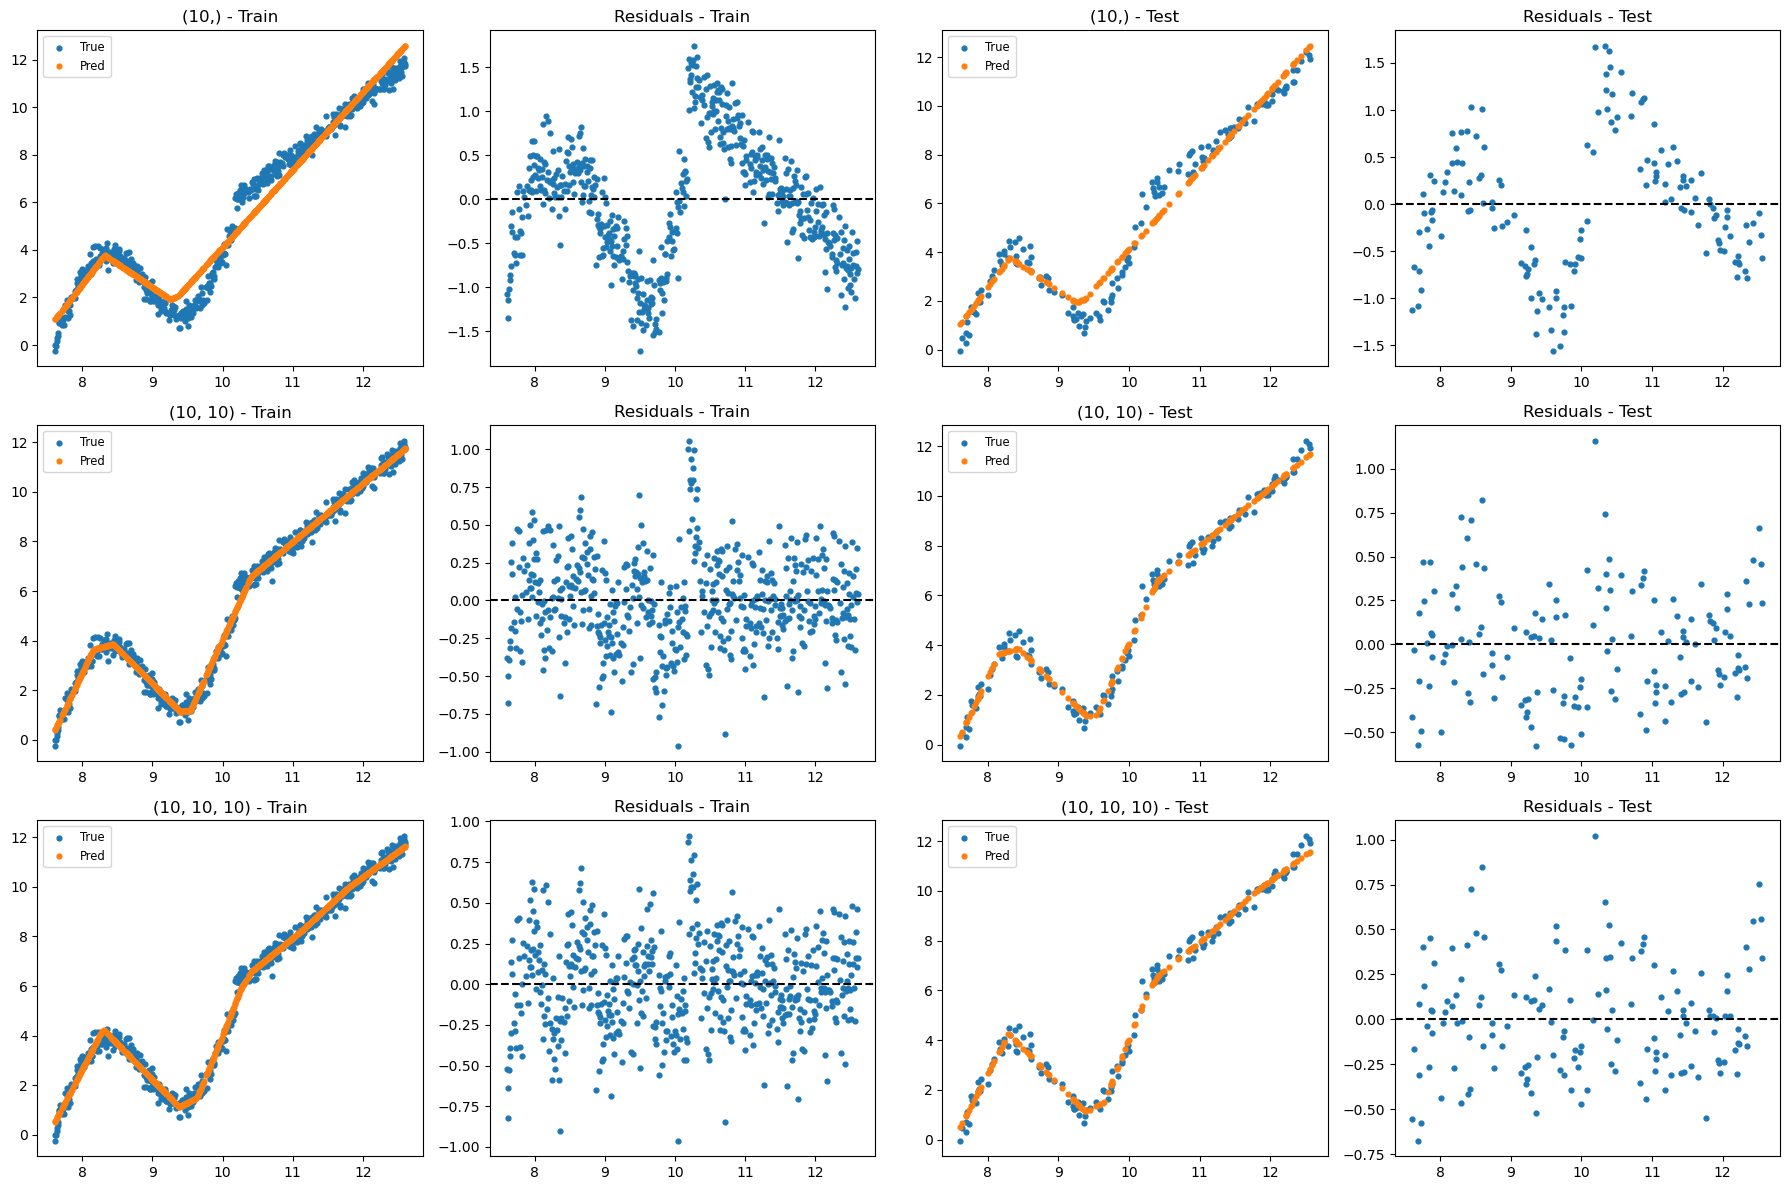

,RMSE_train,RMSE_test,R2_train,R2_test
hidden_layers,,,,
"(10,)",0.6936,0.7020,0.9597,0.9603
"(10, 10)",0.2980,0.3224,0.9926,0.9916
"(10, 10, 10)",0.2896,0.3110,0.9930,0.9922


In [77]:

#Task 6 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def run_nn_depths(depths=[(10,), (10,10), (10,10,10)], degree=1, standardize=True):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    Xtr_poly = poly.fit_transform(X_train)
    Xte_poly = poly.transform(X_test)

    if standardize:
        scaler = StandardScaler().fit(Xtr_poly)
        Xtr = scaler.transform(Xtr_poly)
        Xte = scaler.transform(Xte_poly)
    else:
        Xtr = Xtr_poly.copy()
        Xte = Xte_poly.copy()

    rows = []
    n = len(depths)
    fig, axes = plt.subplots(n, 4, figsize=(18, 4*n), squeeze=False)

    for i, hidden in enumerate(depths):
        mdl = MLPRegressor(hidden_layer_sizes=hidden, max_iter=5000, random_state=1)
        mdl.fit(Xtr, y_train)
        ytr_pred = mdl.predict(Xtr)
        yte_pred = mdl.predict(Xte)

        rmse_tr = np.sqrt(mean_squared_error(y_train, ytr_pred))
        rmse_te = np.sqrt(mean_squared_error(y_test,  yte_pred))
        r2_tr = r2_score(y_train, ytr_pred)
        r2_te = r2_score(y_test, yte_pred)

        rows.append({'hidden_layers': hidden, 'RMSE_train': rmse_tr, 'RMSE_test': rmse_te, 'R2_train': r2_tr, 'R2_test': r2_te})

        # plots
        xtr_vals = X_train.iloc[:,0] if hasattr(X_train, "iloc") else X_train[:,0]
        xte_vals = X_test.iloc[:,0]  if hasattr(X_test, "iloc") else X_test[:,0]

        axes[i,0].scatter(xtr_vals, y_train, label='True', s=12)
        axes[i,0].scatter(xtr_vals, ytr_pred, label='Pred', s=12)
        axes[i,0].set_title(f"{hidden} - Train"); axes[i,0].legend(fontsize='small')

        axes[i,1].scatter(xtr_vals, y_train - ytr_pred, s=12)
        axes[i,1].axhline(0, ls='--', color='k'); axes[i,1].set_title("Residuals - Train")

        axes[i,2].scatter(xte_vals, y_test, label='True', s=12)
        axes[i,2].scatter(xte_vals, yte_pred, label='Pred', s=12)
        axes[i,2].set_title(f"{hidden} - Test"); axes[i,2].legend(fontsize='small')

        axes[i,3].scatter(xte_vals, y_test - yte_pred, s=12)
        axes[i,3].axhline(0, ls='--', color='k'); axes[i,3].set_title("Residuals - Test")

    plt.tight_layout()
    plt.show()

    df = pd.DataFrame(rows).set_index('hidden_layers')
    return df

# run
df_metrics = run_nn_depths(depths=[(10,), (10,10), (10,10,10)], degree=1, standardize=True)
display(df_metrics.round(4))
# ...existing code...

In [78]:
# #Task 7:
# Non-parametric methods can learn complex patterns from data without assuming a fixed formula, so they work well for nonlinear relationships.
# But they usually need more data, can be slow or memory-heavy, are harder to interpret, and perform poorly outside the training range.

#Task 8

Keep LinearRegression as a simple baseline — use it when the relationship looks roughly straight, you need coefficients or easy explanations, or you have little data.

Use RandomForest for better accuracy on this dataset — it handles nonlinear patterns, is robust to outliers, and worked best in your results.

Use KNN only for small problems where predictions depend on nearby points; it’s simple but slow and sensitive to noise, so usually not better than RandomForest. -->

Task 9:
Always inspect data and plots first — they tell you whether a linear model makes sense.

Polynomial features change model flexibility; degree=1 keeps the problem linear.

Standardize polynomial features for NN and SVR — training is more stable and faster.

LinearRegression is a useful, fast baseline when the relationship is roughly straight.

RandomForest gave the best practical accuracy here — good for nonlinear patterns and noisy data.

KNN is simple but slow and sensitive to noise; only good when local neighbors matter.


Outliers can break sensitive models; tree ensembles are more robust than distance‑ or scale‑based methods.